In [21]:
!python -V

Python 3.8.5


# NESSES 5 PASSOS, TRANSFORME OS DADOS EM OURO ...

  Olá pessoal, nesse notebook vamos aprender um pouco sobre 5 passos de ouro que devem ser respeitados para desenvolvimento do seu projeto de *CIÊNCIA DE DADOS* , claro que não são obrigatorios :3 cada um tem sua forma de trabalho, mas sem dúvida alguma você ira realizar cada uma dessas tarefas que serão desenvolvidas abaixo, depende da forma que você particiona a tarefa.  

  Por fim, vamos lá, vamos trabalhar com o clássico banco de dados *TITANIC* , onde queremos desempenhar a seguinte tarefa de classificação: Saber se você sobreviveria ou não ao maior naufrago do mundo. Vamos a batalha !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

* **Importando bibliotecas a serem usadas:**

In [26]:
# Para trabalhar em cima do banco ...

# PASSO (I) E (II)
import pandas as pd # lib para importação e processamento dos dados
import seaborn as sns # lib para visualização dos dados
import matplotlib.pyplot as plt # lib para visualização dos dados (usa-se mais com orientação ao objeto)

# PASSO (III)
from sklearn.preprocessing import MinMaxScaler # Método de pré-processamento, transforma para o intervalo (0, 1)
from sklearn.linear_model import LogisticRegression # Método para classificação da nossa tarefa

# PASSO (IV) E (V)
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline
sns.set_style('darkgrid')

# Extras
import os as os

## PASSO (I): IMPORTANDO E CONHECENDO NOSSO BANCO DE DADOS ...

Primeira coisa, vamos conhecer nosso banco de dados. Ele está estruturado com as seguintes variaveis, e suas descrições :

### Conhecendo o banco:


| Variável |                    Definição                    |                      Chave                     |
|:--------:|:-----------------------------------------------:|:----------------------------------------------:|
| survival |                   Sobrevivente                  |                0 = Não, 1 = Sim                |
|  pclass  |                 Classe do ticket                |            1 = 1st, 2 = 2nd, 3 = 3rd           |
|    sex   |                       Sexo                      |                                                |
|    Age   |                  Idade em anos                  |                                                |
|   sibsp  |    Total de irmãos/esposas abordo do titanic    |                                                |
|   parch  | Total de parentes/filhos (as) abordo do titanic |                                                |
|  ticket  |                 Número do ticket                |                                                |
|   fare   |               Tárifa do passageiro              |                                                |
|   cabin  |                 Número da cabine                |                                                |
| embarked |                Porto de Embarque                | C = Cherbourg, Q = Queenstown, S = Southampton 
|

* **Algumas notas a respeito das variaveis :**
    - pclass: Uma aproximação para o status socioeconômico
        - 1st = Alta
        - 2nd = Média
        - 3rd = Baixa
    
    - age: A idade é fracionária se menor que 1. Se a idade for estimada, é na forma de xx.5

    - sibsp: O conjunto de dados define relações familiar desse jeito ...
    
        - sibling: irmão, irmã, meio irmão, meia irmã

        - spouse: esposo, esposa

    - parch: o conjunto de dados define relações familiar dessa forma ...

        - parent: mãe, pai
    
        - child: filha, filho, enteado, enteada

        - Algumas crianças viajavam apenas com a babá, portanto parch = 0 para elas.
        

### Importando os dados:

Agora vamos importar os dados, mas vale ressaltar o seguinte: o banco está partido em dois, em dados de *teste* e *treino* , mas é intuitivo o porque, um nos iremos utilizar mais a frente para treinar nosso modelo *(titanic_train)* e logo em seguida, utilizaremos o outro para testar o nosso modelo de regressão logistica *(titanic_test)* .

* **Notas sobre os bancos:**
    - *titanic_train* : possui todas as variaveis explicitadas acima;
    - *titanic_test* : possui todas as variaveis explicitadas acima, menos o nosso *target* (survival).

Agora vamos trabalhar !! vamos importar eles :

In [ ]:
os.getcwd()

In [27]:
def get_data(path, name, sep = '/'):
    df = pd.read_csv('/'.join(os.getcwd().split(f'{sep}')) + f'/{path}/' + name)
    return df

In [32]:
# Para quem esta usando o colab, mude a variavel "dir" para receber o seguinte
# dir = 'DSem5Passos/notebooks/steps/data'
dir = 'data'
names = ('titanic_train.csv','titanic_test.csv')
df = {}
for  name in names:
    df[name] = get_data(path = dir, name = name, sep = '/')
df_train, df_test = df[names[0]], df[names[1]]

In [34]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [36]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [37]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [38]:
print('Titanic treino: ')
print()
print(f'\t  Variaveis: {df_train.shape[1]} \n \t  Número de instancias: {df_train.shape[0]}')
print()
print()
print('Titanic teste: ')
print()
print(f'\t  Variaveis: {df_test.shape[1]} \n \t  Número de instancias: {df_test.shape[0]}')

Titanic treino: 

	  Variaveis: 12 
 	  Número de instancias: 891


Titanic teste: 

	  Variaveis: 11 
 	  Número de instancias: 418


Que tal juntar os bancos ?! mas claro, sem a variavel *target* do nosso projeto. Possa ser que seja interessante analisarmos o conjunto como um todo, para retirarmos algumas estatisticas interessantes sobre o nosso conjunto. Então vamos juntar os bancos, sem considerar o target:

In [41]:
df = pd.concat([df_train.drop(['Survived'], axis = 1), df_test],ignore_index=1)
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
print('Titanic dataset (- survived): ')
print()
print(f'\t  Variaveis: {df.shape[1]} \n \t  Número de instancias: {df.shape[0]}')

Titanic dataset (- survived): 

	  Variaveis: 11 
 	  Número de instancias: 1309


In [16]:
df_train.shape[0] + df_test.shape[0] == df.shape[0]

True

## PASSO (II): ANÁLISE E VISUALIZAÇÃO DOS DADOS ...

Vamos agora analisar oque temos em mãos, ver como está organizado o nosso banco de dados, para daí retirarmos algumas informações importantes do nosso *dataset*. Vamos lá:

In [46]:
df.drop(['PassengerId'], axis = 1).describe()

,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,80.000000,8.000000,9.000000,512.329200


In [59]:
df.isna().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [47]:
# Antes de tudo, vamos dar uma olhada nos dados faltantes desse banco ... 
print(f'Dados faltantes no banco TITANIC todo: {df.isna().sum().sum()}')

Dados faltantes no banco TITANIC todo: 1280


In [64]:
# Dados faltantes, por variavel (bruto)
df.isna().sum().sum()

1280

In [65]:
# Dados faltantes, por variavel (em percentual)
(df.isna().sum()/df.shape[0])*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
dtype: float64

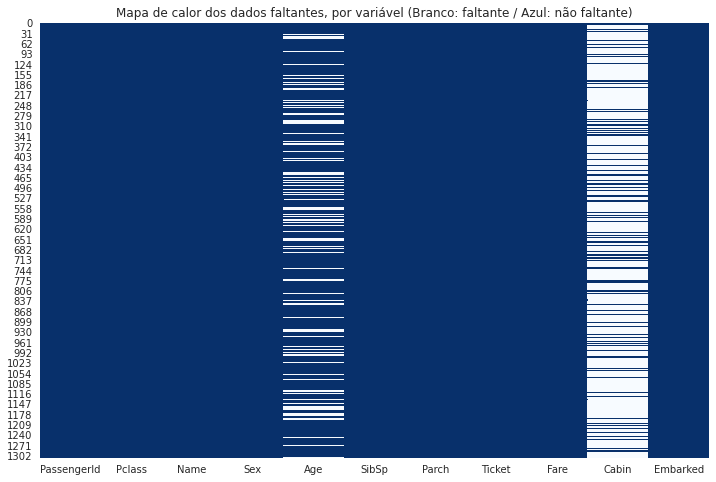

In [67]:
# Vamos olhar agora por variavel, de uma forma mais "bonita" ... 
plt.figure(figsize=(12,8))
sns.heatmap(df.isna(), cmap = 'Blues_r', cbar = False)

plt.title('Mapa de calor dos dados faltantes, por variável (Branco: faltante / Azul: não faltante)')
plt.show()

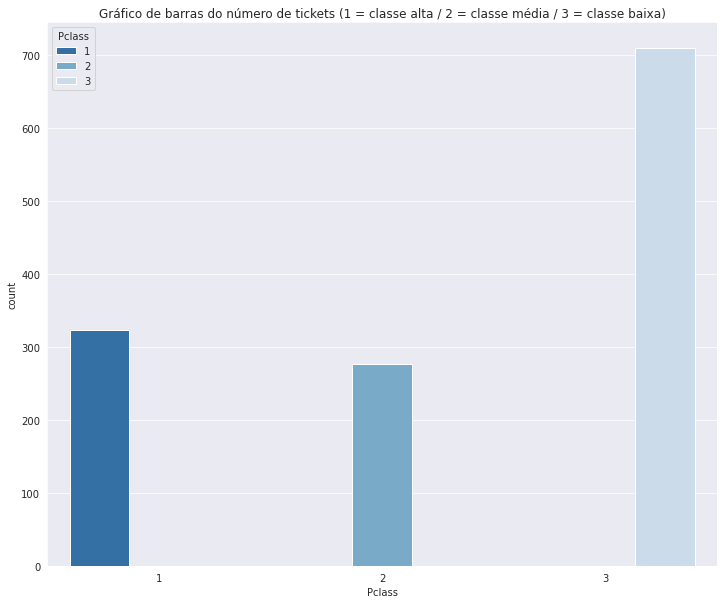

In [68]:
plt.figure(figsize=(12,10))
sns.countplot(data=df, x = 'Pclass', palette='Blues_r', hue = 'Pclass')

plt.title('Gráfico de barras do número de tickets (1 = classe alta / 2 = classe média / 3 = classe baixa)')
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='count'>

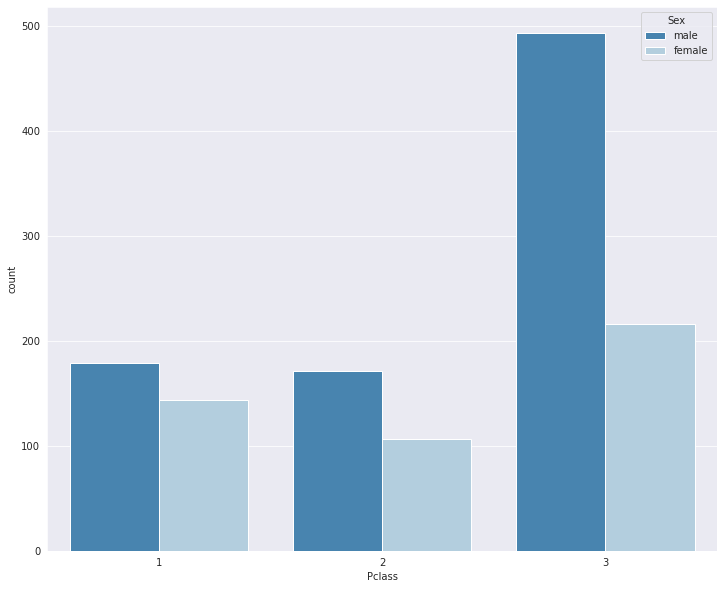

In [69]:
plt.figure(figsize=(12,10))
sns.countplot(data=df, x = 'Pclass', palette='Blues_r', hue = 'Sex')

<Figure size 1224x576 with 0 Axes>

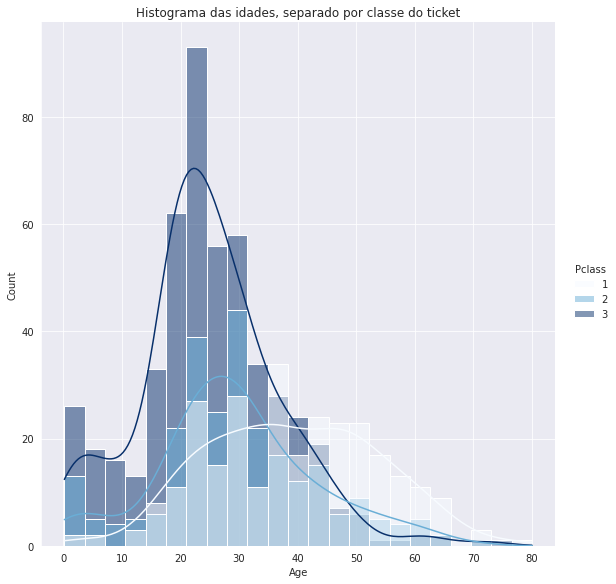

In [70]:
plt.figure(figsize=(17,8))

img = sns.displot(data = df, hue = 'Pclass', x = 'Age', palette = 'Blues', kde = True,height=8)


plt.title("Histograma das idades, separado por classe do ticket")

plt.show()

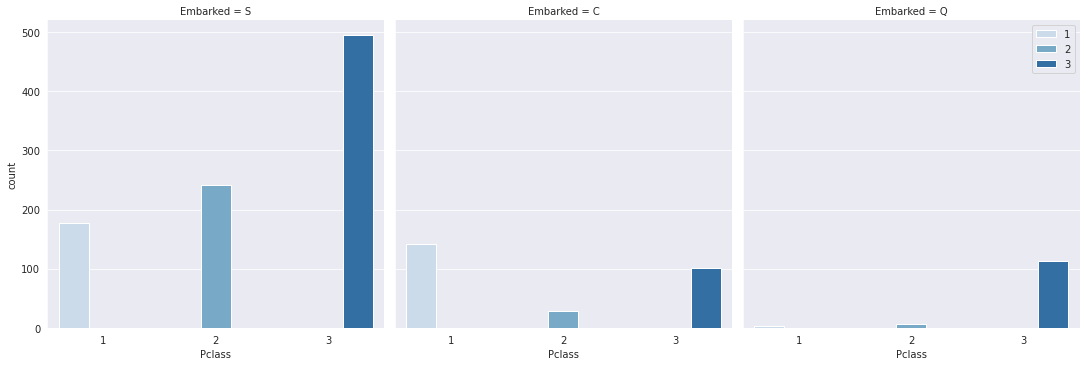

In [71]:
sns.catplot(x="Pclass", hue="Pclass", col="Embarked",
                data=df, kind="count", palette='Blues')

plt.legend()
plt.show()

<Figure size 864x576 with 0 Axes>

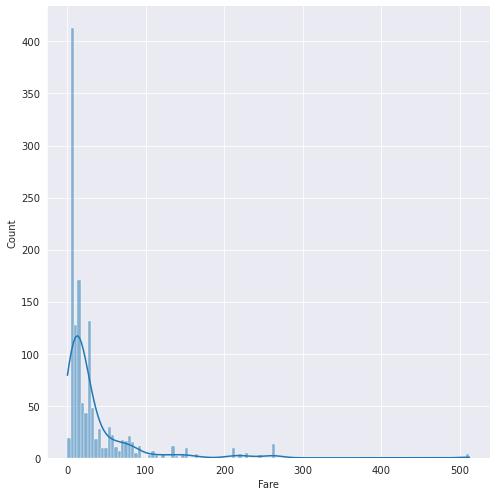

In [72]:
plt.figure(figsize=(12,8))

sns.displot(data = df, x = 'Fare', palette = 'Blues', kde = True,height=7)

plt.show()

### Vamos olhar agora para o banco de dados de *treino* ...

Perceba que apenas o banco de dados de treino apresenta a variável *survived* , isto se dá pois para a nossa tarefa de regressão logistica, sendo classificada como um tipo de aprendizado supervisionado, onde informamos o nosso rótulo que esta associado a uma instância, para o nosso modelo de *Aprendizagem de Máquina* , devemos informar este rótulo no momento de *treino* do nosso modelo. Vamos dar uma visualizada no que esta acontecendo ...

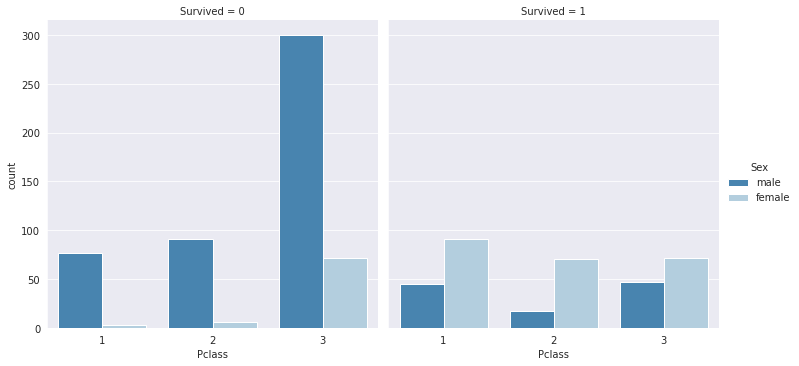

In [73]:
sns.catplot(x="Pclass", hue="Sex", col="Survived",
                data=df_train, kind="count", palette='Blues_r')
plt.show()

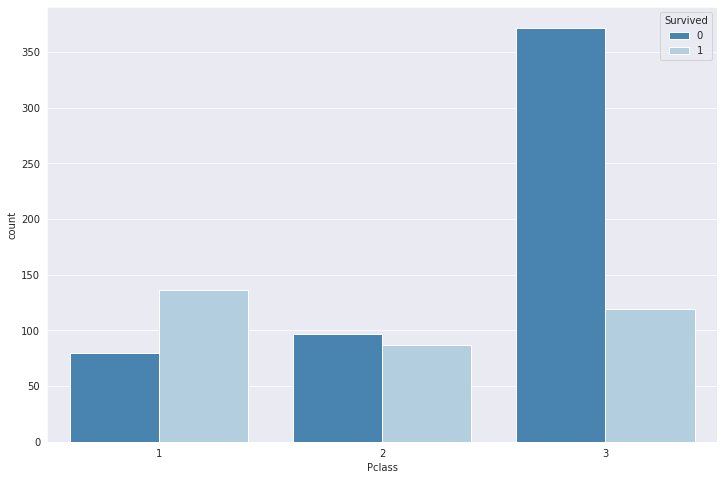

In [74]:
plt.figure(figsize=(12,8))

sns.countplot(data = df_train, x = 'Pclass', hue = 'Survived', palette='Blues_r')

plt.show()

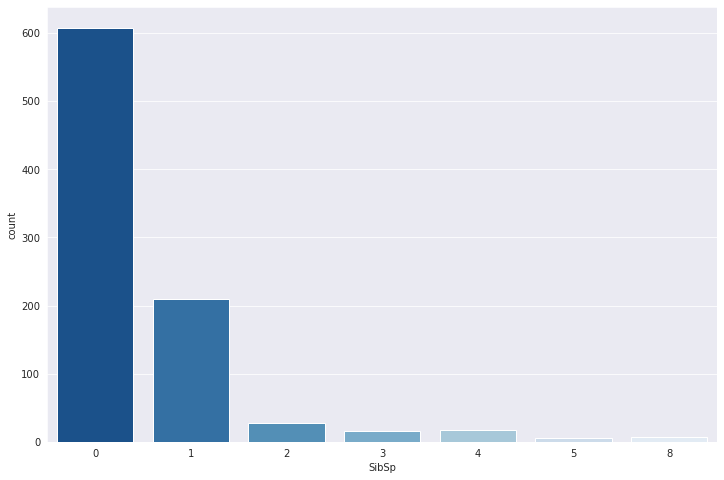

In [75]:
plt.figure(figsize=(12,8))

sns.countplot(x = 'SibSp', data = df_train, palette='Blues_r')

plt.show()

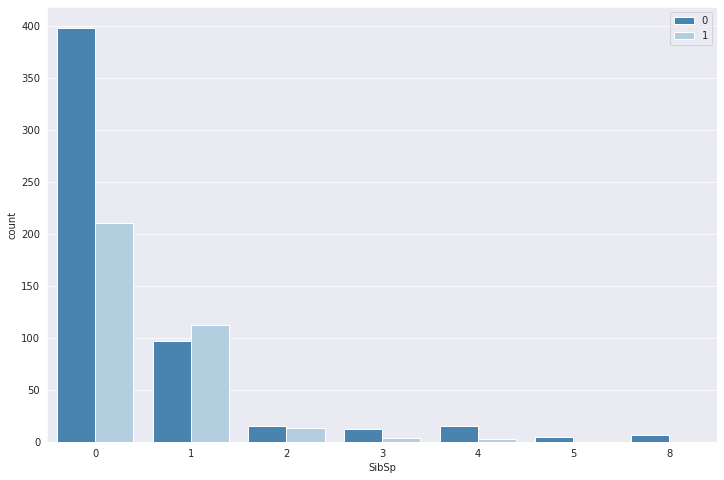

In [76]:
plt.figure(figsize=(12,8))

sns.countplot(x='SibSp',data=df_train, hue = 'Survived', palette='Blues_r')

plt.legend(loc = 1)
plt.show()

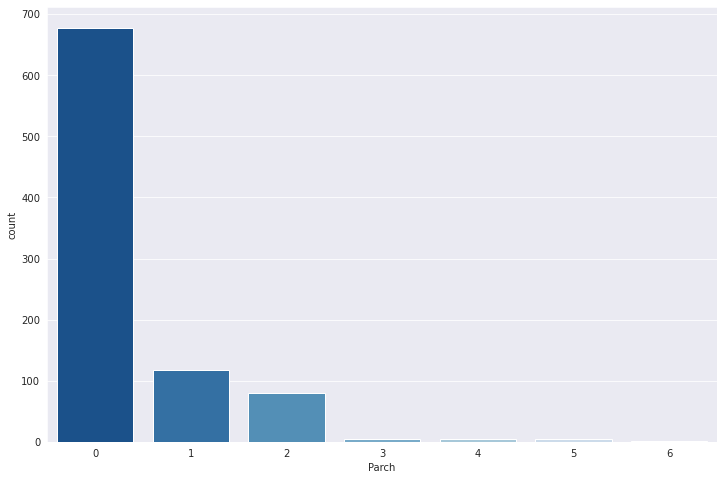

In [77]:
plt.figure(figsize=(12,8))

sns.countplot(x = 'Parch', data = df_train, palette='Blues_r')

plt.show()

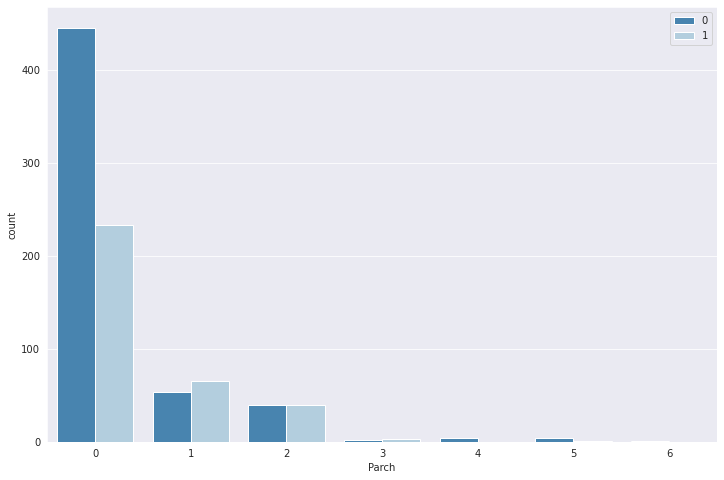

In [78]:
plt.figure(figsize=(12,8))


sns.countplot(x='Parch',data=df_train, hue = 'Survived', palette='Blues_r')

plt.legend(loc = 1)
plt.show()

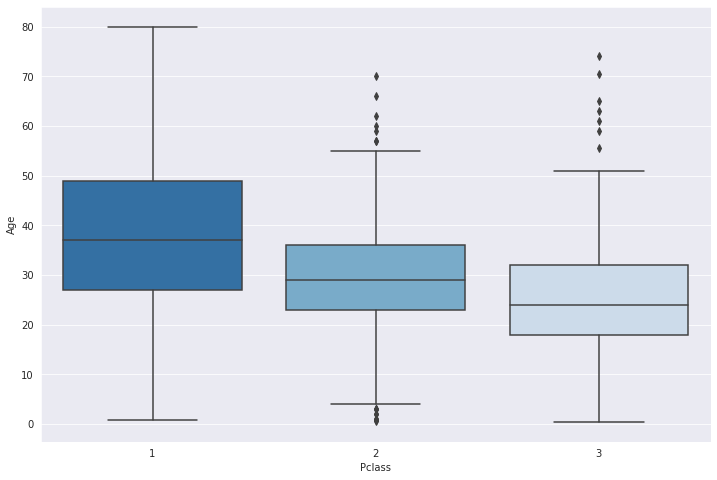

In [79]:
plt.figure(figsize=(12,8))

sns.boxplot(data = df_train, y = 'Age', x = 'Pclass', palette='Blues_r')

plt.show()

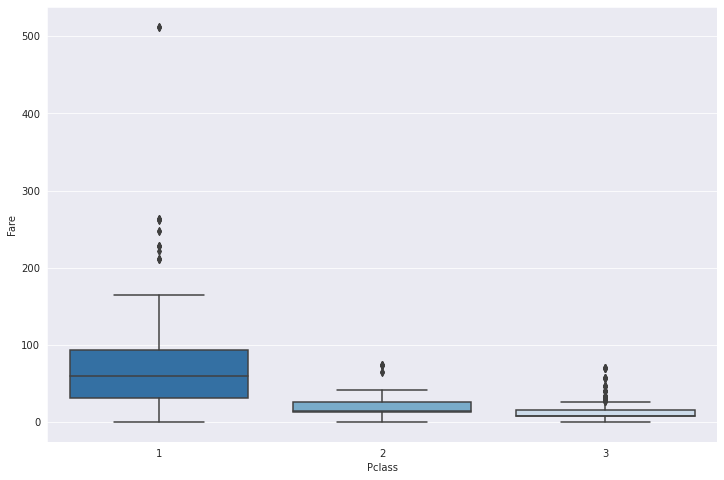

In [80]:
plt.figure(figsize=(12,8))

sns.boxplot(data = df_train, y = 'Fare', x = 'Pclass', palette='Blues_r')

plt.show()

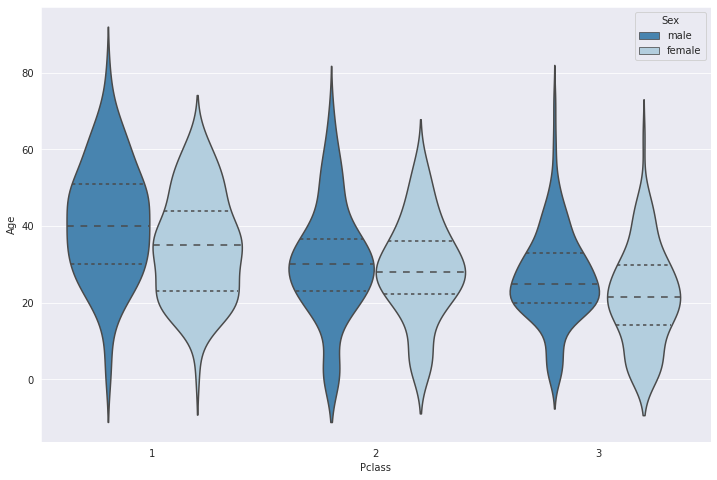

In [81]:
plt.figure(figsize = (12,8))
sns.violinplot(data = df_train, x = 'Pclass', y = 'Age', hue= 'Sex',palette = 'Blues_r',
              inner="quartile")

plt.show()

## PASSO (III): PRÉ-PROCESSAMENTO OU FEATURE ENGINEERING ...

Agora vamos trabalhar um pouco na parte de "pedreiragem", como costumo dizer. Nesse passo, vamos analisar o nosso banco para ver oque podemos fazer para melhorar o poder preditivo do nosso modelo, realizando trabalhos em cima do nosso dataset, ou seja, um pré-processamento sobre o banco, para "entregarmos os dados para o nosso modelo". Vamos lá: 

Repare que, a partir das analises feitas da parte anterior, podemos perceber uma série de coisas que pode afetar o nosso modelo, vamos citar algumas que iremos "dar uma ajeitada" nesse passo do *Feature Engineering* :

In [82]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* **Problemas Encontrados :**
    - **(1)** Dados faltantes ;
    - **(2)** Colunas não interessantes para o modelo;
    - **(3)** Dados categóricos, sem ser númerico;
    - **(4)** Colunas que podem ser mudadas (Ex.: Idade, podemos subdividir em crianças, adultos e idosos)
    - **(5)** Dados em diferentes escalas.

* **Possiveis Soluções :**
    - **(1.1)** Realizar uma "imputação" pela média da variável, caso a variável apresente boa quantidade de dados não faltantes (Também existem outros tipos de "imputação", além da média);
    - **(1.2)** Para linhas de variáveis que apresentam muito pouco dados faltantes, podemos remover essa linha, caso necessário;
    - **(1.3)** Caso a variável apresente uma grande quantidade de dados faltantes,  e aparentemente ela não apresente uma importancia relativa para a classificação do seu target, podemos a retirar;
    - **(2)** Dropando colunas desnecessarias para o instanciamento do modelo;
    - **(3)** Devemos transformar cada categoria em valores númericos (Ex.: 1, 2, 3);
    - **(4)** Apenas adicionar colunas númericas que representem as categórias de criança, adulto e idoso;
    - **(5)** Para isso, podemos realizar transformações  matemáticas com o intuito de padronizar os dados, ou seja, transformar em uma escala único. Esse processo é conhecido de *Feature Scalling*.

### (1.1) Vamos realizar o processo de "imputação" pela média:

In [83]:
c1_mean= df_train[df_train['Pclass'] == 1].Age.mean()
c2_mean= df_train[df_train['Pclass'] == 2].Age.mean()
c3_mean= df_train[df_train['Pclass'] == 3].Age.mean()

def imput(columns):
    xcol, ycol = columns[0], columns[1]
    if pd.notna(xcol):
        return xcol
    else:
        if ycol == 1:
            return c1_mean
        if ycol == 2:
            return c2_mean
        if ycol == 3:
            return c3_mean


In [84]:
df_train['Age'] = df_train[['Age','Pclass']].apply(imput,axis=1)
df_train.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### (1.2) Removendo a linha com dado faltante:

In [85]:
df_train = df_train[df_train['Embarked'].notna()]
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

### (1.3) Vamos remover a coluna que apresenta grande quantidade de dados faltantes, e não apresenta informação relevante (Cabin):

In [86]:
df_train.drop(['Cabin'],axis = 1, inplace = True)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Repare agora como nosso dataset ficou :

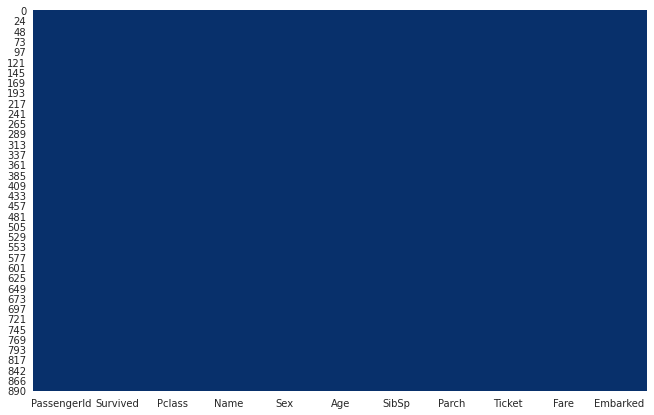

In [87]:
plt.figure(figsize=(11,7))

sns.heatmap(df_train.isna(), cmap = 'Blues_r', cbar= False)

plt.show()

In [88]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### (2) Dropando colunas desnecessarias para o isntanciamento do modelo

Se analisarmos, podemos dropar as seguintes colunas, por não serem importantes para o nosso modelo :

* *PassengerId*: Essa coluna basicamente mostra apenas um número de identificação do passageiro, e nada relacionado a sobreviver ou não ao naufrágo;

* *Name*: O nome do sujeito, não interfere em sua sobrevivênci;

* *Ticket*: O ticket da pessoa é a sua passagem, porém possui muitas variações, não sendo interessante para o nosso modelo.

In [89]:
df_train.drop(['Name', 'PassengerId', 'Ticket'], axis = 1, inplace = True)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### (3) Transformando variaveis categoricas em númericas:

Para esta tarefa, vamos transformar as variaveis *Sex* e *Embarked* em númericas. Perceba que ao transformarmos  a variável *Sex* númerico, podemos representar agora como: 1 para ser do sexo masculino e 0 caso contrario.

In [91]:
df_train['Sex'] = pd.get_dummies(df_train['Sex'], drop_first = True)  
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [92]:
df_train[['C', 'Q', 'S']] = pd.get_dummies(df_train['Embarked'])  
df_train.drop(['Embarked'], axis = 1, inplace = True)
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,22.00000,1,0,7.2500,0,0,1
1,1,1,0,38.00000,1,0,71.2833,1,0,0
2,1,3,0,26.00000,0,0,7.9250,0,0,1
3,1,1,0,35.00000,1,0,53.1000,0,0,1
4,0,3,1,35.00000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.00000,0,0,13.0000,0,0,1
887,1,1,0,19.00000,0,0,30.0000,0,0,1
888,0,3,0,25.14062,1,2,23.4500,0,0,1
889,1,1,1,26.00000,0,0,30.0000,1,0,0


### (4) Adicionando a coluna referente a classe da idade (Ex.: 0 = Criança / 1 = Adulto / 2 = Idoso):

In [93]:
def classifier(col, clss = [0,1,2], age = [17,40]):
    group = []
    for i in range(len(col)):
        if col[i] <= age[0]:
            group.append(clss[0])
        elif (col[i] > age[0]) and (col[i] <= age[1]):
            group.append(clss[1])
        else:
            group.append(clss[2])
    return group

In [94]:
# Vamos corrigir um pequeno problema com relação ao index do datafram
df_train.index = pd.Int64Index(range(df_train.shape[0]))

In [95]:
df_train['cAge'] = classifier(df_train.Age)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,cAge
0,0,3,1,22.0,1,0,7.2500,0,0,1,1
1,1,1,0,38.0,1,0,71.2833,1,0,0,1
2,1,3,0,26.0,0,0,7.9250,0,0,1,1
3,1,1,0,35.0,1,0,53.1000,0,0,1,1
4,0,3,1,35.0,0,0,8.0500,0,0,1,1


In [98]:
df_train.cAge.unique()

array([1, 2, 0])

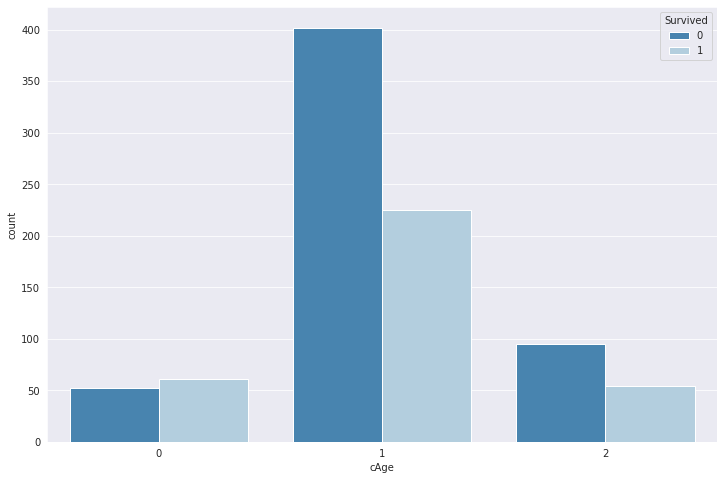

In [99]:
plt.figure(figsize=(12,8))

sns.countplot(data=df_train, x = 'cAge', hue = 'Survived', palette = 'Blues_r')

plt.show()

### (5) Tratando os dados em diferentes escalas:

Para isso, vamos utilizar o famoso metodo *Min Max Scale*, que transforma os nossos dados para o intervalo (0, 1), da seguinte forma :

$$
    f(x| x.min, x.max) = \dfrac{x - x.min()}{x.max() - x.min()}
$$

Vamos transformar as variáveis ...

In [100]:
scaler = MinMaxScaler()
scaler.fit(df_train.drop(['Survived'],axis = 1))
df_train_transform = pd.DataFrame(scaler.transform(df_train.drop(['Survived'],axis = 1)), 
                                  columns = df_train.drop(['Survived'],axis=1).columns)
df_train_transform['Survived'] = df_train.Survived

In [101]:
df_train_transform.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,cAge,Survived
0,1.0,1.0,0.271174,0.125,0.0,0.014151,0.0,0.0,1.0,0.5,0
1,0.0,0.0,0.472229,0.125,0.0,0.139136,1.0,0.0,0.0,0.5,1
2,1.0,0.0,0.321438,0.000,0.0,0.015469,0.0,0.0,1.0,0.5,1
3,0.0,0.0,0.434531,0.125,0.0,0.103644,0.0,0.0,1.0,0.5,1
4,1.0,1.0,0.434531,0.000,0.0,0.015713,0.0,0.0,1.0,0.5,0


In [103]:
df_train_transform.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,cAge,Survived
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.655793,0.649044,0.362230,0.065523,0.063742,0.062649,0.188976,0.086614,0.724409,0.520247,0.382452
std,0.417350,0.477538,0.165575,0.137963,0.134460,0.097003,0.391710,0.281427,0.447063,0.270834,0.486260
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.271174,0.000000,0.000000,0.015412,0.000000,0.000000,0.000000,0.500000,0.000000
50%,1.000000,1.000000,0.321438,0.000000,0.000000,0.028213,0.000000,0.000000,1.000000,0.500000,0.000000
75%,1.000000,1.000000,0.453380,0.125000,0.000000,0.060508,0.000000,0.000000,1.000000,0.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### (+) Aplicando as modificações sobre os dados de teste:

Precisamos aplicar as mesmas modificações sobre os nossos dados de teste também, pois caso contrário, o nosso modelo não receberá as variáveis que assim o espera. Vamos lá:

In [104]:
df_test['Age'] = df_test[['Age','Pclass']].apply(imput,axis=1)
df_test.isnull().sum() 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [105]:
df_test.drop(['Cabin'],axis = 1, inplace = True)
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [106]:
df_test = df_test[df_test['Fare'].notna()]
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [107]:
df_test.drop(['Name', 'PassengerId', 'Ticket'], axis = 1, inplace = True)
df_test.head()

/home/manuel/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [108]:
df_test['Sex'] = pd.get_dummies(df_test['Sex'], drop_first = True)  
df_test.head()

<ipython-input-108-20a9bac37e0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Sex'] = pd.get_dummies(df_test['Sex'], drop_first = True)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,Q
1,3,0,47.0,1,0,7.0000,S
2,2,1,62.0,0,0,9.6875,Q
3,3,1,27.0,0,0,8.6625,S
4,3,0,22.0,1,1,12.2875,S


In [109]:
df_test[['C', 'Q', 'S']] = pd.get_dummies(df_test['Embarked'])  
df_test.drop(['Embarked'], axis = 1, inplace = True)
df_test.head()

/home/manuel/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/home/manuel/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,3,1,34.5,0,0,7.8292,0,1,0
1,3,0,47.0,1,0,7.0000,0,0,1
2,2,1,62.0,0,0,9.6875,0,1,0
3,3,1,27.0,0,0,8.6625,0,0,1
4,3,0,22.0,1,1,12.2875,0,0,1


In [110]:
# Vamos corrigir um pequeno problema com relação ao index do datafram
df_test.index = pd.Int64Index(range(df_test.shape[0]))

In [111]:
df_test['cAge'] = classifier(df_test.Age)
df_test.head()

<ipython-input-111-3ddb1d734305>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['cAge'] = classifier(df_test.Age)


,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,cAge
0,3,1,34.5,0,0,7.8292,0,1,0,1
1,3,0,47.0,1,0,7.0000,0,0,1,2
2,2,1,62.0,0,0,9.6875,0,1,0,2
3,3,1,27.0,0,0,8.6625,0,0,1,1
4,3,0,22.0,1,1,12.2875,0,0,1,1


In [112]:
scaler = MinMaxScaler()
scaler.fit(df_test)
df_test_transform = pd.DataFrame(scaler.transform(df_test), 
                                  columns = df_test.columns)

In [113]:
df_test_transform.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,cAge
0,1.0,1.0,0.452723,0.000,0.000000,0.015282,0.0,1.0,0.0,0.5
1,1.0,0.0,0.617566,0.125,0.000000,0.013663,0.0,0.0,1.0,1.0
2,0.5,1.0,0.815377,0.000,0.000000,0.018909,0.0,1.0,0.0,1.0
3,1.0,1.0,0.353818,0.000,0.000000,0.016908,0.0,0.0,1.0,0.5
4,1.0,0.0,0.287881,0.125,0.111111,0.023984,0.0,0.0,1.0,0.5
